In [1]:
# python -m pip install ipykernel
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv("data/stud.csv")
data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
print(f"Gender:{data['gender'].unique()}")
print(f"Race Ethnicity: {data['race_ethnicity'].unique()}")
print(f"Test Preparation: {data['test_preparation_course'].unique()}")
print(f"Lunch: {data['lunch'].unique()}")
print(f"Education: {data['parental_level_of_education'].unique()}")


Gender:['female' 'male']
Race Ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Test Preparation: ['none' 'completed']
Lunch: ['standard' 'free/reduced']
Education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
n_features = [feature for feature in data.columns if data[feature].dtype != 'O']
c_features = [feature for feature in data.columns if data[feature].dtype == 'O']
print(n_features)
print(c_features)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [11]:
data['total_score'] = data['math_score']+data['reading_score']+data['writing_score']
data['average'] = data['total_score']/3
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
read = data[data['reading_score']==100]['total_score'].count() ## Count works on only column names only so here i take average but we can also take anyone since we not have anu null values
write = data[data['writing_score']==100]['total_score'].count()
math = data[data['math_score']==100]['total_score'].count()
print(f'Number of students with full marks in Maths: {math}')
print(f'Number of students with full marks in Writing: {write}')
print(f'Number of students with full marks in Reading: {read}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [13]:
read_20 = data[data['reading_score']<=20]['total_score'].count() ## Count works on only column names only so here i take average but we can also take anyone since we not have anu null values
write_20 = data[data['writing_score']<=20]['total_score'].count()
math_20 = data[data['math_score']<=20]['total_score'].count()
print(f'Number of students with less than 20 marks in Maths: {math_20}')
print(f'Number of students with less than 20 marks in Writing: {write_20}')
print(f'Number of students with less than 20 marks in Reading: {read_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


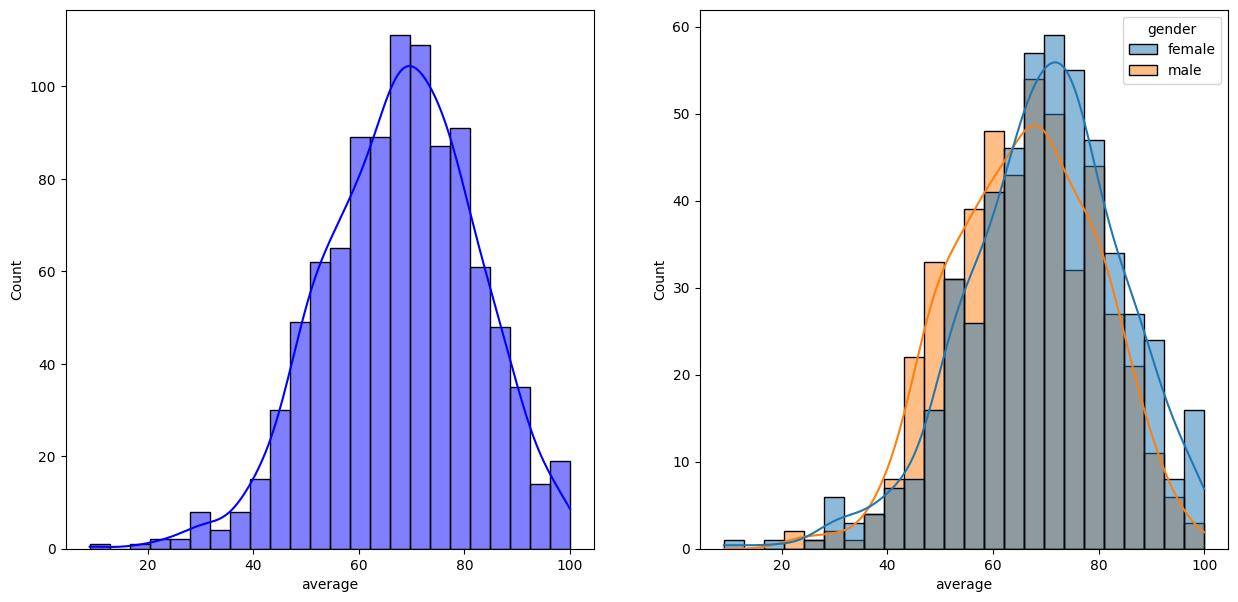

In [14]:
fig,axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data, x='average',color='b',kde=True)
plt.subplot(122)
sns.histplot(data=data, kde=True, x='average', hue='gender')
plt.show()

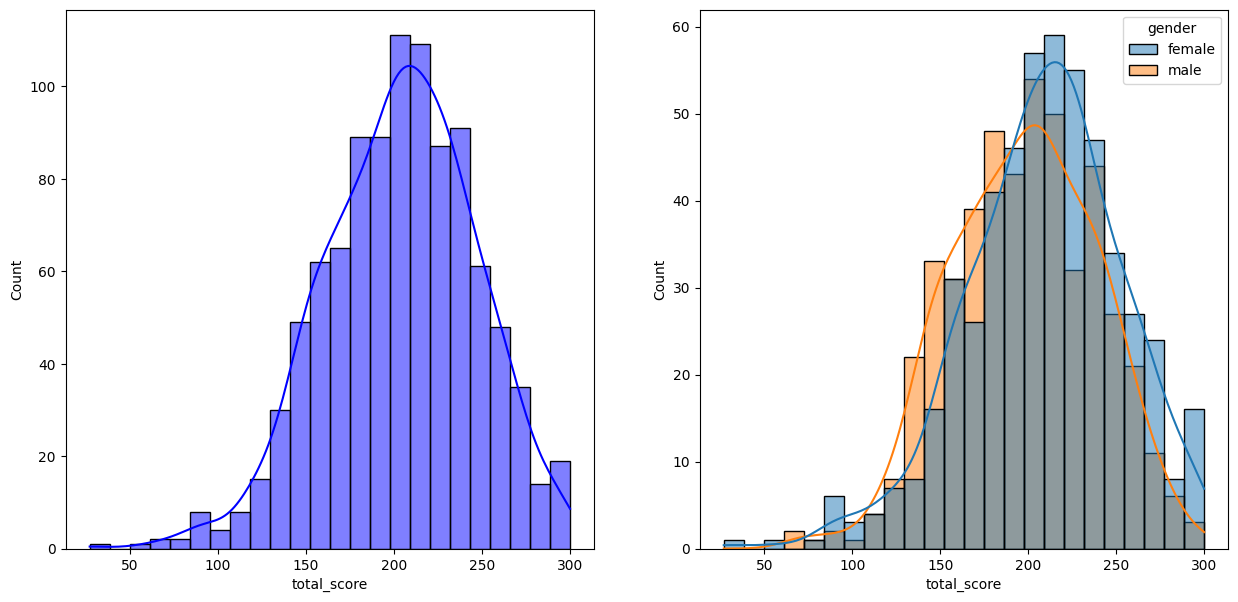

In [15]:
fig,axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data, x='total_score',color='b',kde=True)
plt.subplot(122)
sns.histplot(data=data, kde=True, x='total_score', hue='gender')
plt.show()

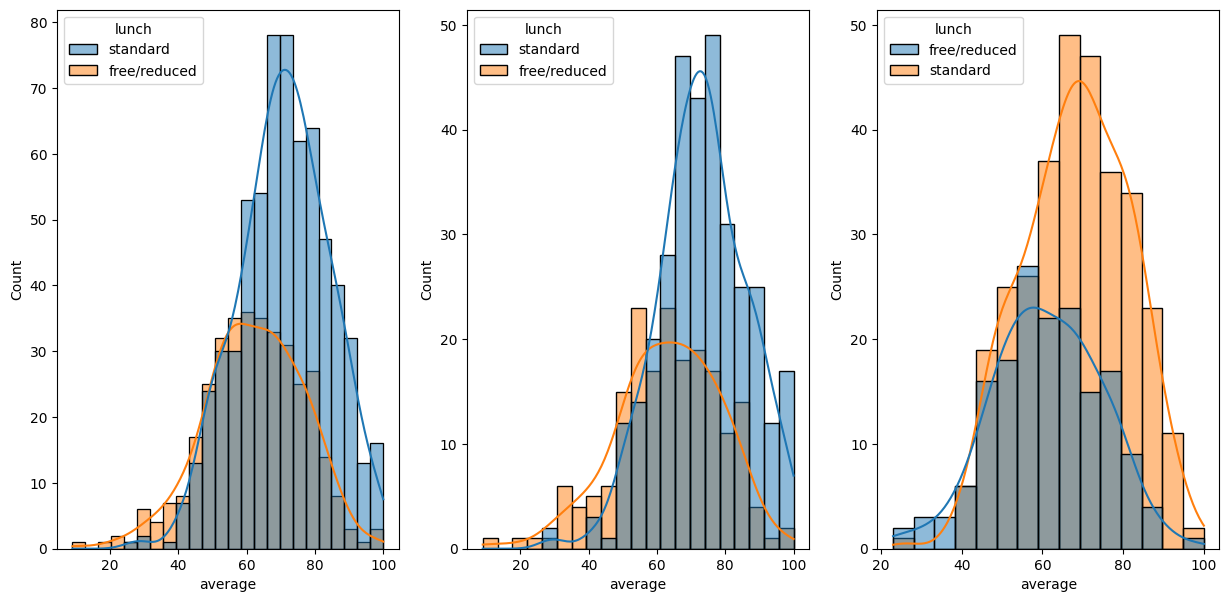

In [16]:
plt.subplots(1, 3, figsize=(15, 7))
plt.subplot(131)
sns.histplot(data=data, x='average', kde=True, color='y', hue='lunch')
plt.subplot(132)
sns.histplot(data=data[data['gender']=='female'], x='average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=data[data['gender']=='male'], x='average', kde=True,  hue='lunch')
plt.show()


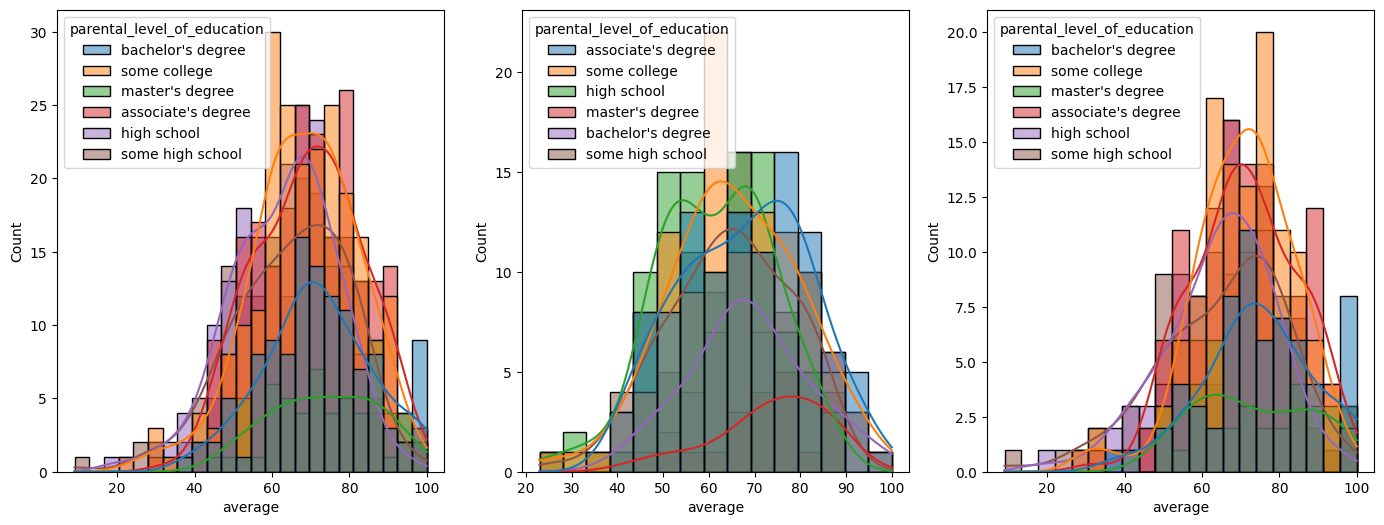

In [17]:
plt.subplots(1,3,figsize=(17,6))
plt.subplot(131)
ax =sns.histplot(data=data,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

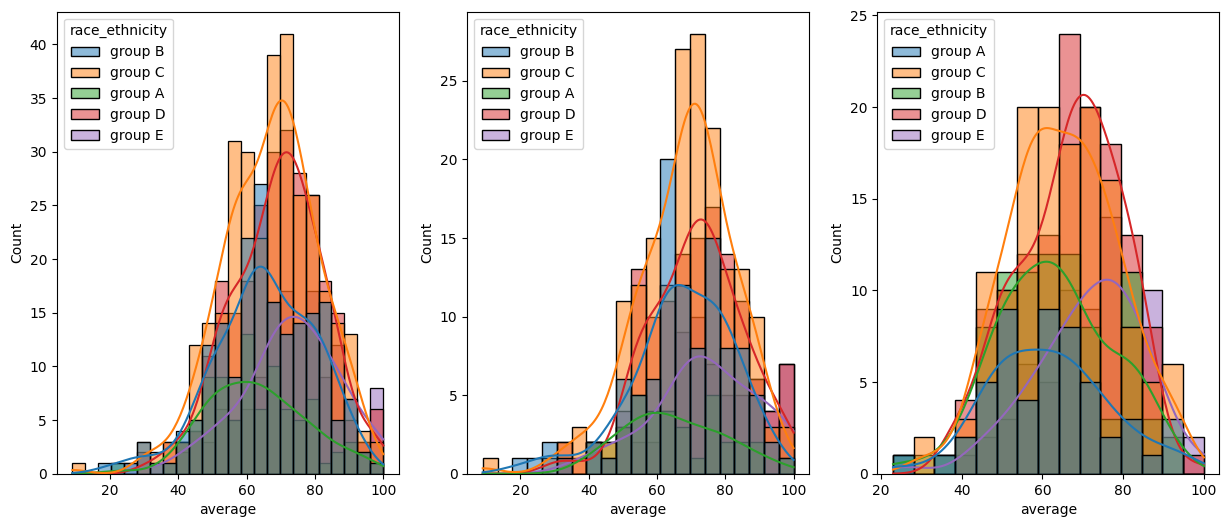

In [18]:
plt.subplots(1,3,figsize=(15,6))
plt.subplot(131)
ax =sns.histplot(data=data,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

<Axes: title={'center': 'Writing Scores'}, ylabel='writing_score'>

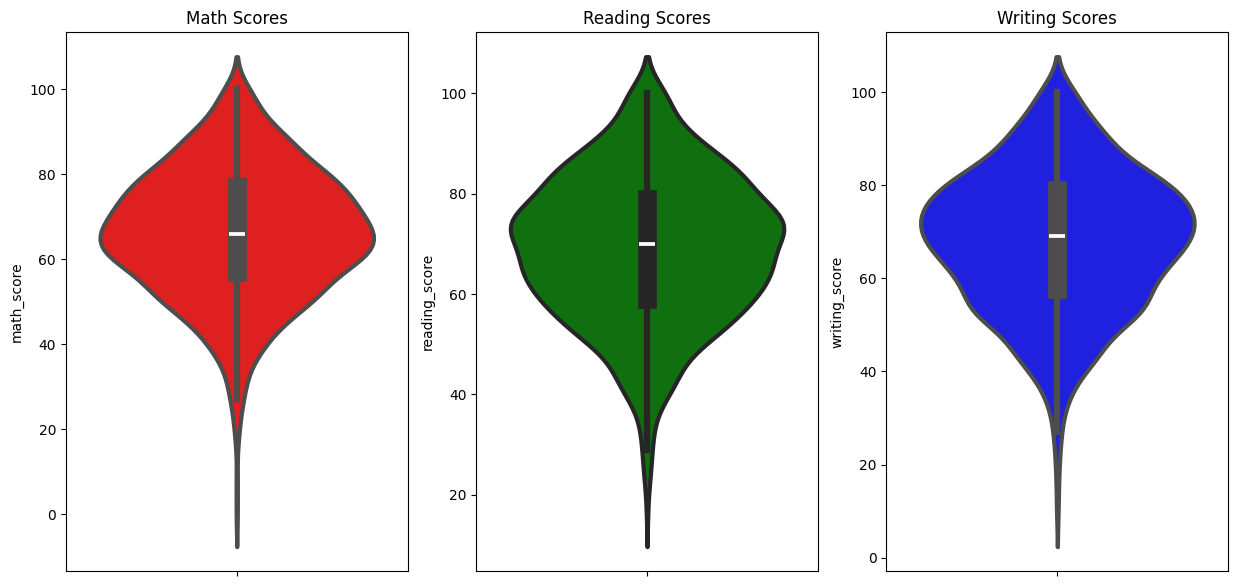

In [19]:
plt.subplots(1, 3, figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.title('Math Scores')
sns.violinplot(y='math_score', data=data, color='red', linewidth=3)
plt.subplot(1, 3, 2)
plt.title('Reading Scores')
sns.violinplot(y='reading_score', data=data, color='green', linewidth=3)
plt.subplot(1, 3, 3)
plt.title('Writing Scores')
sns.violinplot(y='writing_score', data=data, color='blue', linewidth=3)

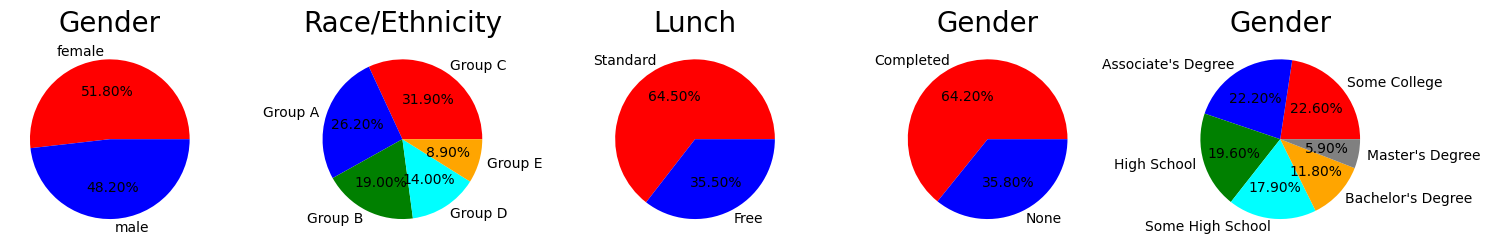

In [20]:
# rcParams stands for runtime configuration parameters. It’s a dictionary-like object in matplotlib that stores all the default settings for how your plots look and behave.

plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(1, 5,  1)
size = data['gender'].value_counts()
labels = 'female', 'male'
colors = ['red','blue']
plt.pie(size, labels=labels, colors=colors, autopct="%.2f%%")
plt.title('Gender', fontsize = 20)
plt.axis('off')
#- %.2f means: show the number as a float with 2 decimal places
#- %% escapes the % symbol so it appears as a literal percent sign

plt.subplot(1, 5,  2)
size = data['race_ethnicity'].value_counts()
labels = 'Group C','Group A','Group B','Group D','Group E'
colors = ['red','blue','green','cyan','orange']
plt.pie(size, labels=labels, colors=colors, autopct="%.2f%%")
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5,  3)
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'
colors = ['red','blue']
plt.pie(size, labels=labels, colors=colors, autopct="%.2f%%")
plt.title('Lunch', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5,  4)
size = data['test_preparation_course'].value_counts()
labels = 'Completed', 'None'
colors = ['red','blue']
plt.pie(size, labels=labels, colors=colors, autopct="%.2f%%")
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5,  5)
size = data['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
colors = ['red','blue','green','cyan','orange','grey']
plt.pie(size, labels=labels, colors=colors, autopct="%.2f%%")
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.tight_layout()
plt.show()



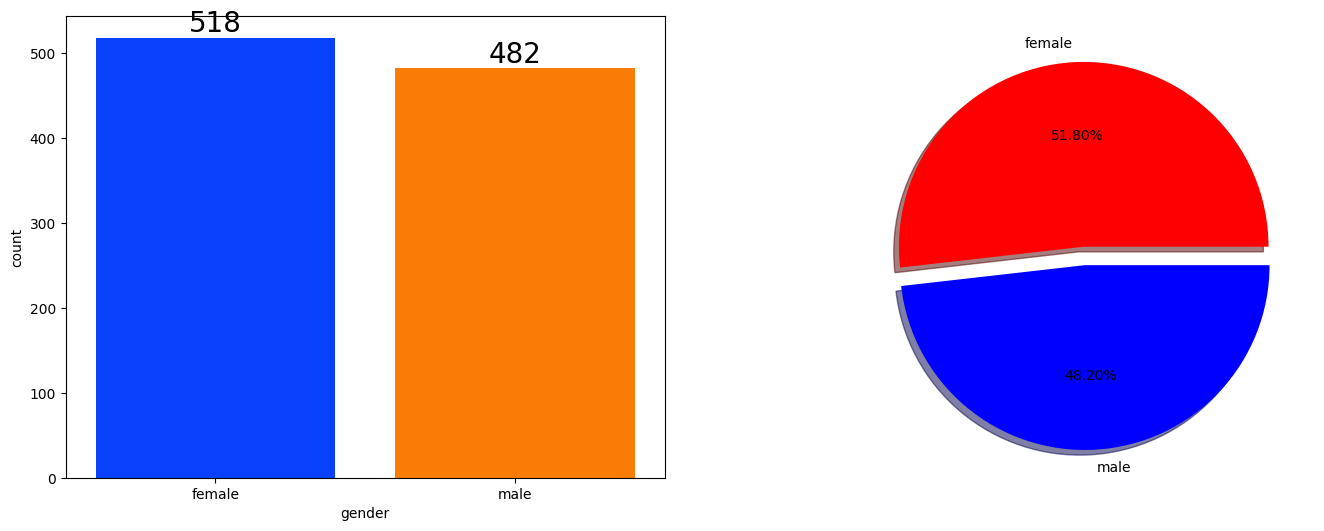

In [21]:
f , ax = plt.subplots(1, 2, figsize=(17, 6))
sns.countplot(x = data['gender'], data=data, palette='bright', saturation=0.95, ax=ax[0])

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
plt.pie(data['gender'].value_counts(), labels=["female", "male"], colors=["red", "blue"], autopct="%.2f%%", explode=[0, 0.1], shadow=True)
plt.show()

In [22]:
gender_group = data.groupby('gender').mean(numeric_only=True)
gender_group
# .mean(numeric_only=True)
# After grouping, this computes the mean (average) for each numeric column, separately for each gender group.
# numeric_only=True means it will only calculate the mean for numeric columns (ignoring text or categorical columns).

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


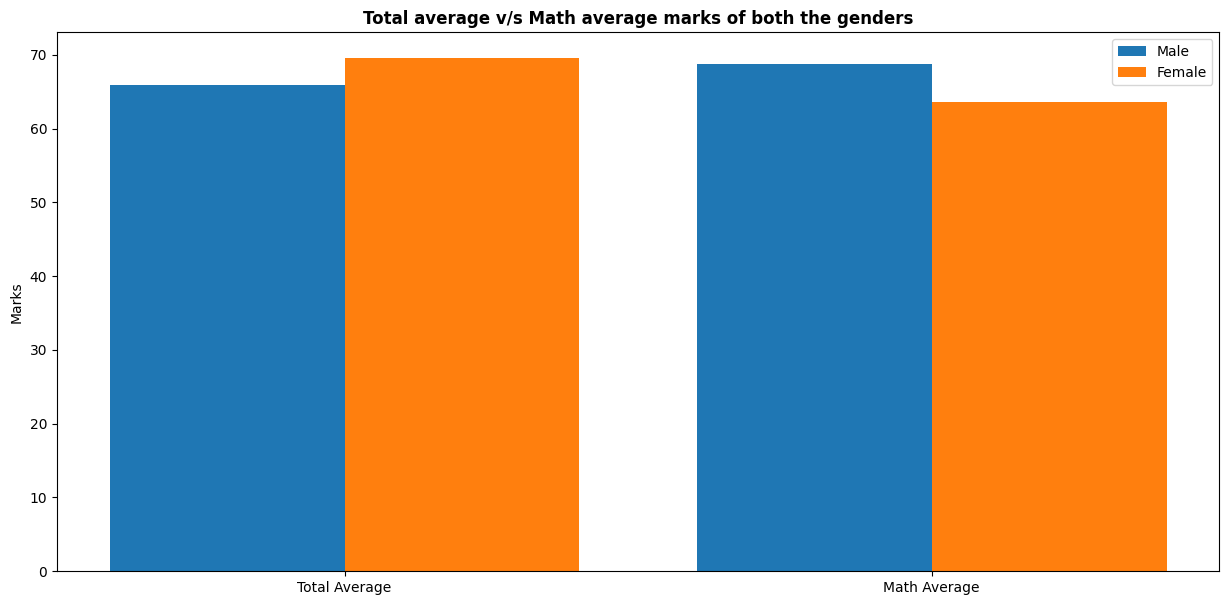

In [23]:
plt.figure(figsize=(15, 7))
X = ["Total Average", "Math Average"]

X_axis = np.arange(len(X))
female_scores = [gender_group["average"][0], gender_group["math_score"][0]]
male_scores = [gender_group["average"][1], gender_group["math_score"][1]]

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

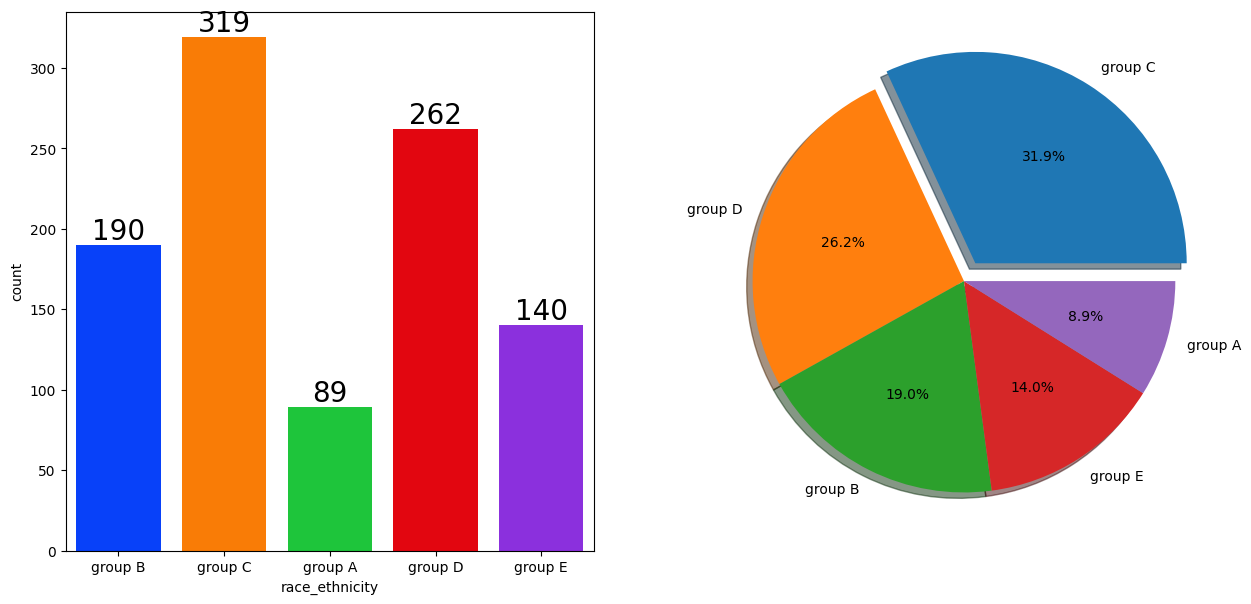

In [24]:
f, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.countplot(data=data, x=data['race_ethnicity'], saturation=0.95, palette="bright", ax=ax[0])
# ax = plt.gca()   # get the current axes

# # Now customize the axes using ax
# ax.set_title("My First Plot")
# ax.set_xlabel("X values")
# ax.set_ylabel("Y values")
# ax.grid(True)

for container in ax[0].containers:
    ax[0].bar_label(container, size=20,color="black" )
plt.pie(x=data['race_ethnicity'].value_counts(), labels=data['race_ethnicity'].value_counts().index, explode=[0.1, 0, 0, 0, 0], shadow=True, autopct="%1.1f%%")
plt.show()


# .index of value_counts() gives the category names (like "group A", "group B", …).
# 👉 These are the labels shown next to each slice.

# explode controls how much each slice is pulled out from the center.

# Here, the first slice is pulled out 0.1 units, and the rest stay at 0.
# 👉 This is usually done to highlight one category.

In [ ]:
# Group_data2=data.groupby('race_ethnicity')
# f,ax=plt.subplots(1,3,figsize=(20,8))
# sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
# ax[0].set_title('Math score',color='#005ce6',size=20)

# for container in ax[0].containers:
#     ax[0].bar_label(container,color='black',size=15)

# sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
# ax[1].set_title('Reading score',color='#005ce6',size=20)

# for container in ax[1].containers:
#     ax[1].bar_label(container,color='black',size=15)

# sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
# ax[2].set_title('Writing score',color='#005ce6',size=20)

# for container in ax[2].containers:
#     ax[2].bar_label(container,color='black',size=15)


In [33]:
Group_data2=data.groupby('race_ethnicity')
Group_data2.describe()
print(data.columns)


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')


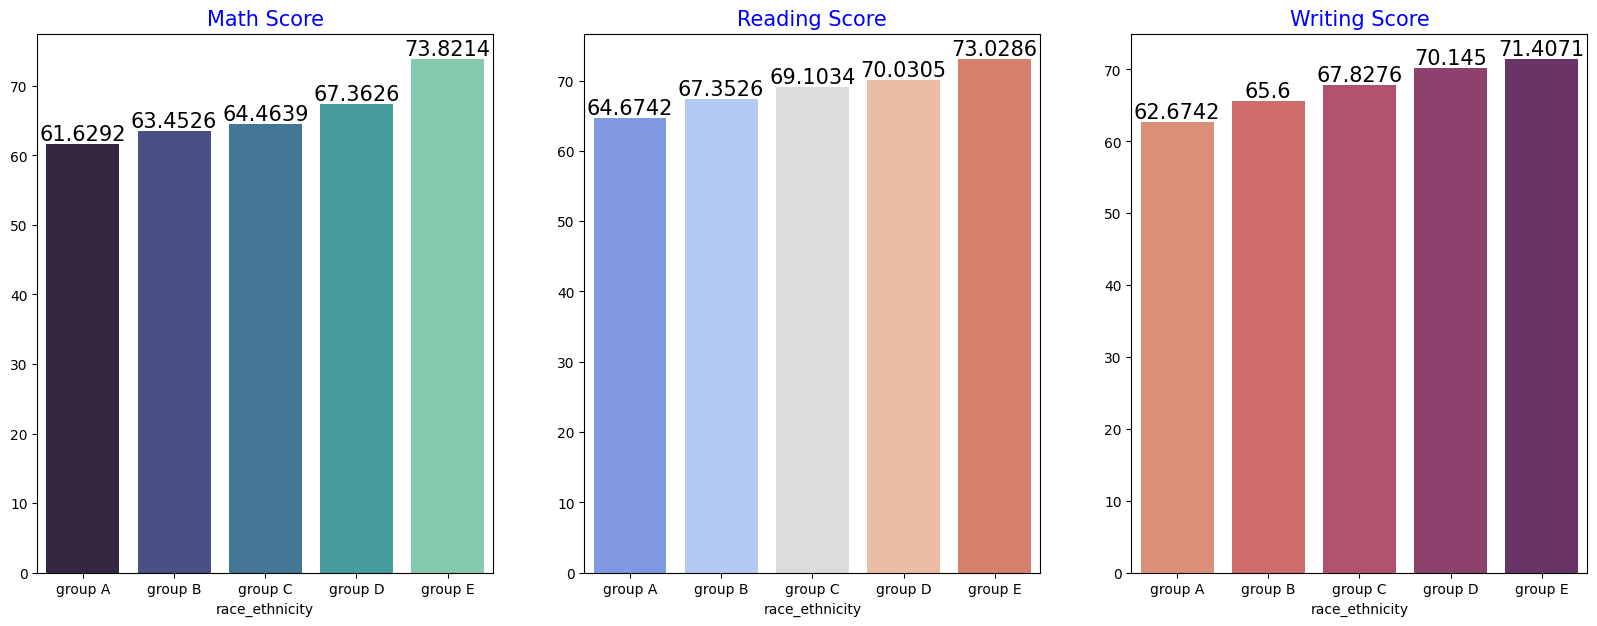

In [47]:
## countplot is for categorical data and  barplot is for categorical data
Group_data2=data.groupby('race_ethnicity')
# print(Group_data2.describe())

# Every pandas Series and DataFrame has an index → the set of labels for the rows.

# .index gives you those labels.

f, ax = plt.subplots(1, 3, figsize=(20, 7))
sns.barplot(x = Group_data2["math_score"].mean().index, y=Group_data2['math_score'].mean().values,palette = "mako",ax=ax[0])
ax[0].set_title("Math Score", color="blue", size=15)
for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size=15)
    
    
sns.barplot(x = Group_data2["reading_score"].mean().index, y=Group_data2['reading_score'].mean().values,palette = "coolwarm",ax=ax[1])
ax[1].set_title("Reading Score", color="blue", size=15)
for container in ax[1].containers:
    ax[1].bar_label(container, color="black", size=15)
    
sns.barplot(x = Group_data2["writing_score"].mean().index, y=Group_data2['writing_score'].mean().values,palette = "flare",ax=ax[2])
ax[2].set_title("Writing Score", color="blue", size=15)
for container in ax[2].containers:
    ax[2].bar_label(container, color="black", size=15)
    
plt.show()



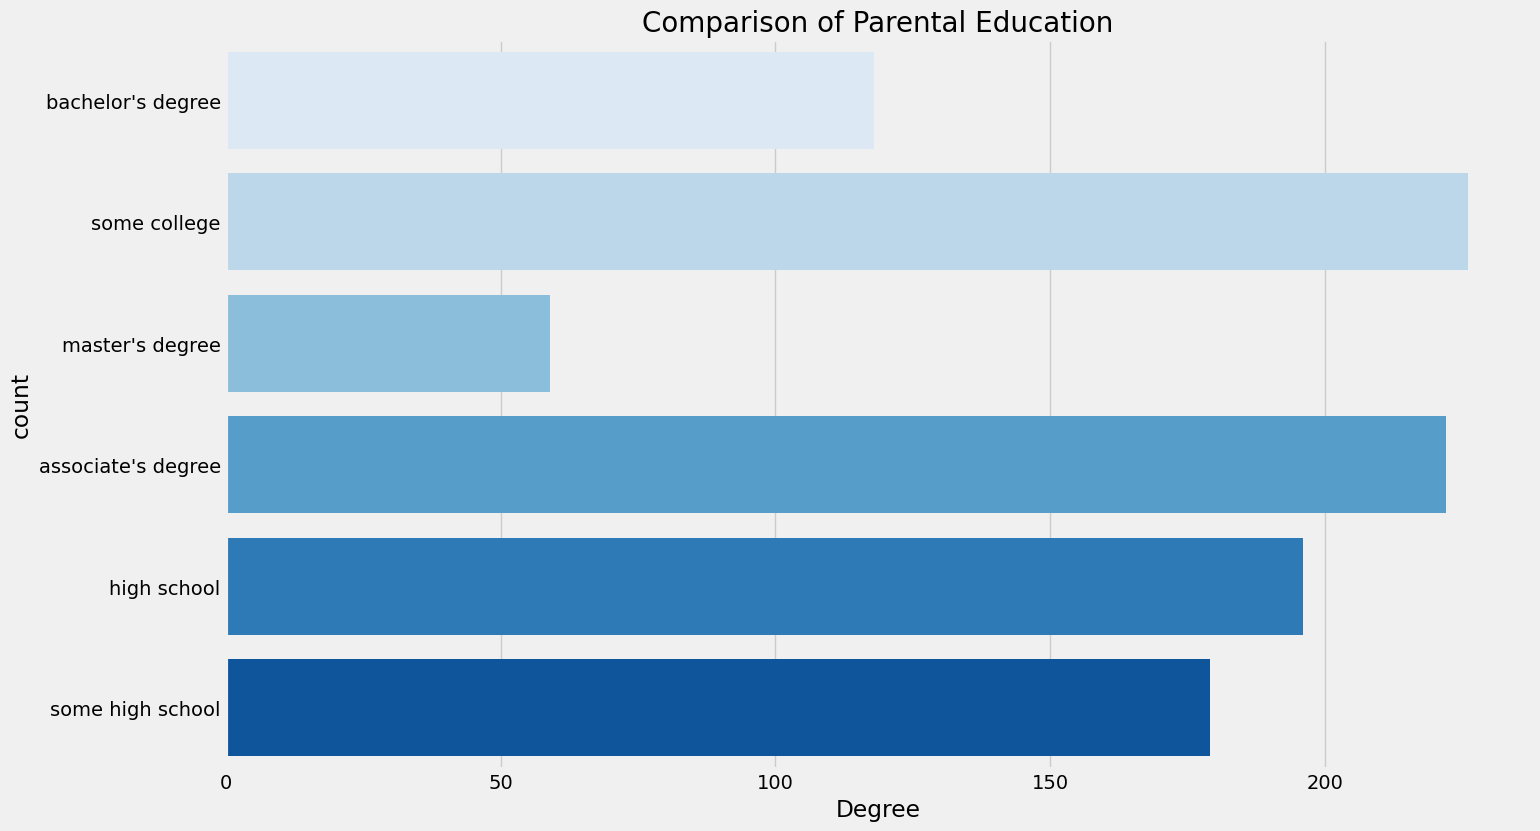

In [50]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(data['parental_level_of_education'], palette = 'Blues', saturation=0.95)
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

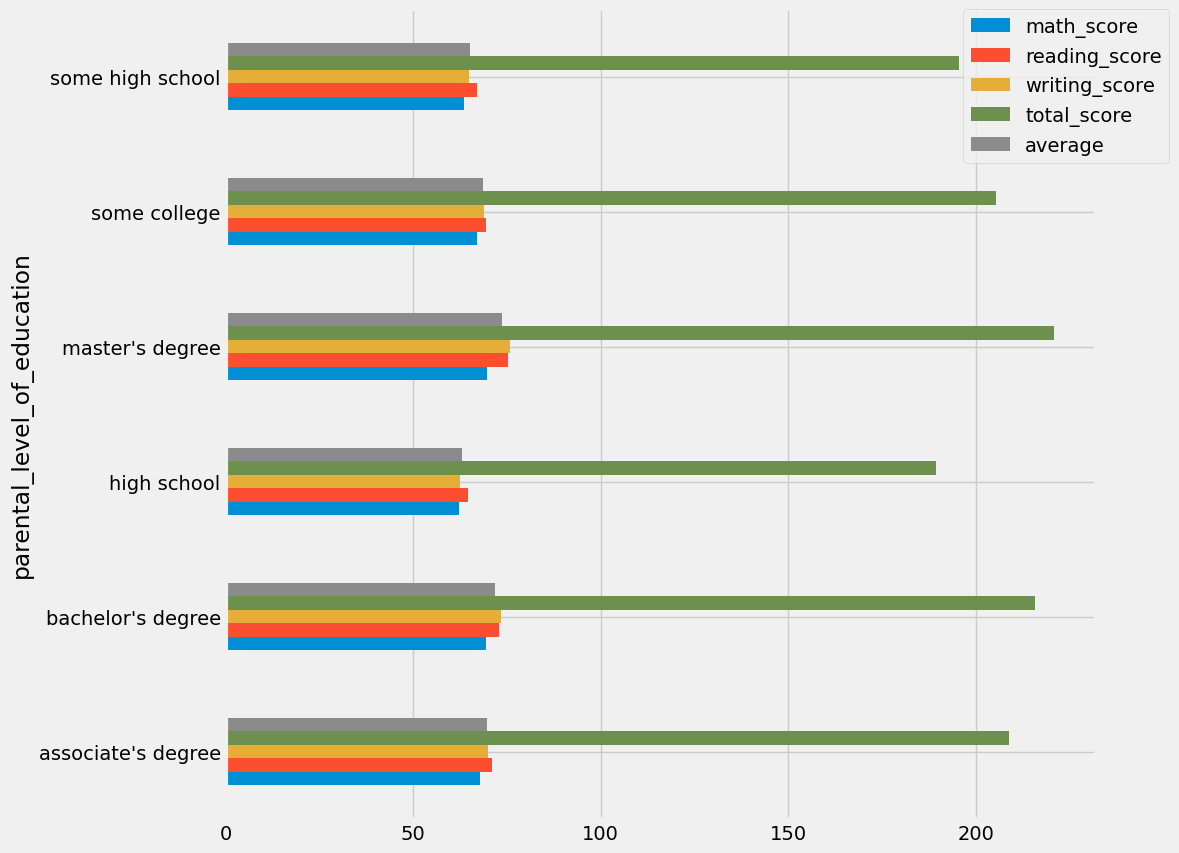

In [69]:
data.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.085, 1), loc=1, borderaxespad=0.)
plt.show()

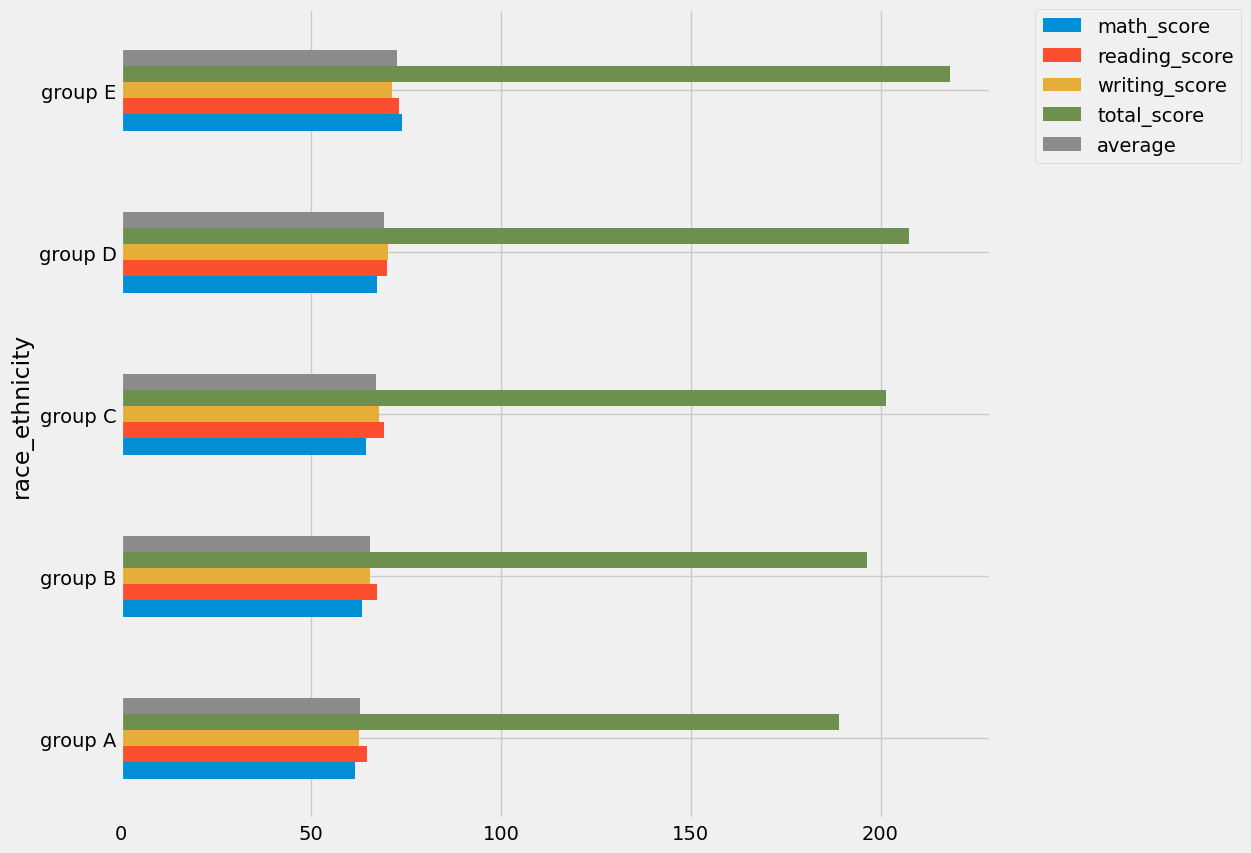

In [71]:
data.groupby('race_ethnicity').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

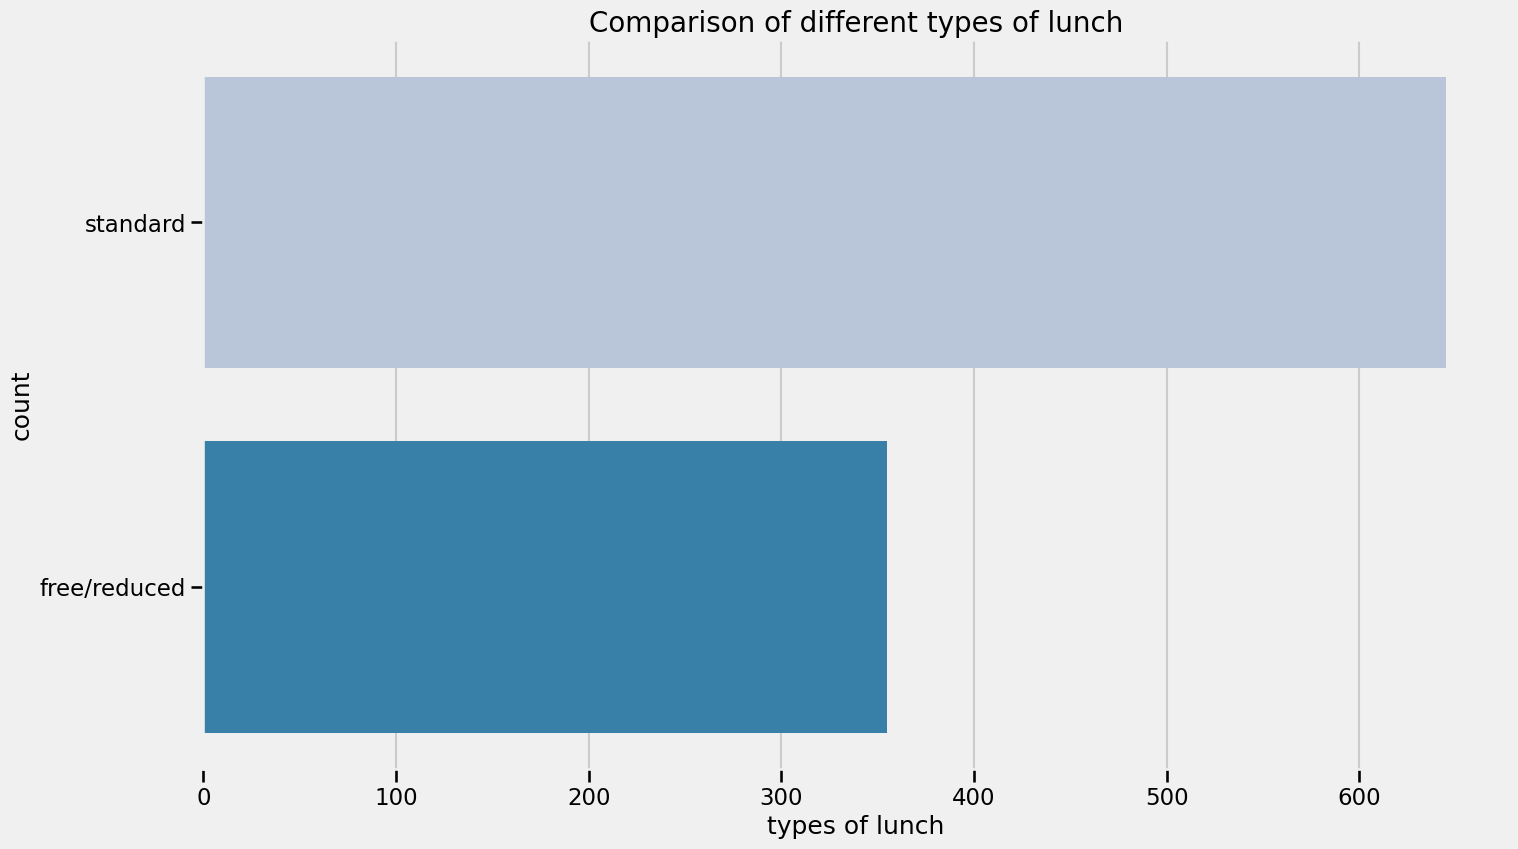

In [74]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.set_context('talk')
sns.countplot(data['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

              math_score  reading_score  writing_score
lunch                                                 
free/reduced   58.921127      64.653521      63.022535
standard       70.034109      71.654264      70.823256


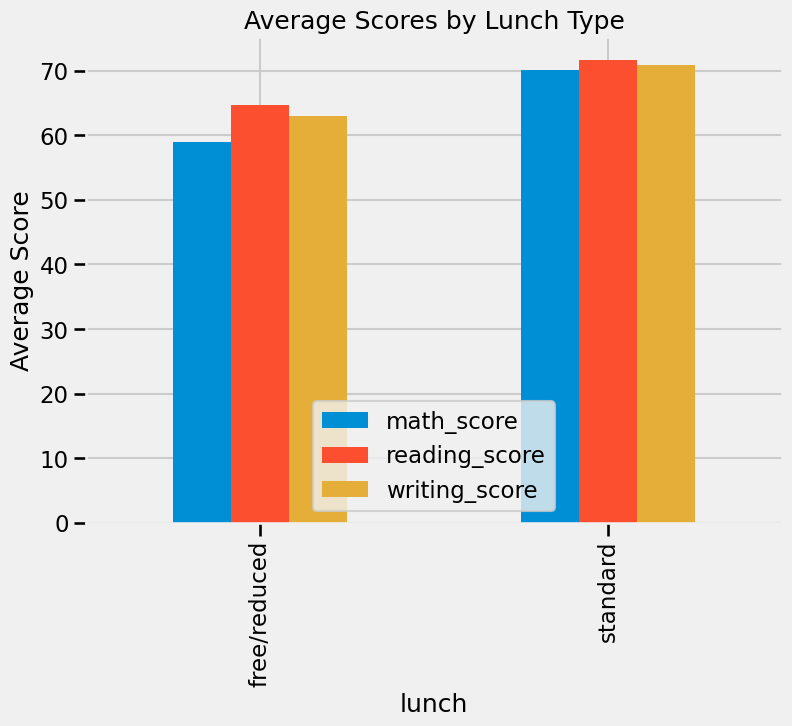

In [75]:
avg_scores = data.groupby("lunch")[["math_score", "reading_score", "writing_score"]].mean()
print(avg_scores)

# Plotting
avg_scores.plot(kind="bar", figsize=(8,6))
plt.title("Average Scores by Lunch Type")
plt.ylabel("Average Score")
plt.show()

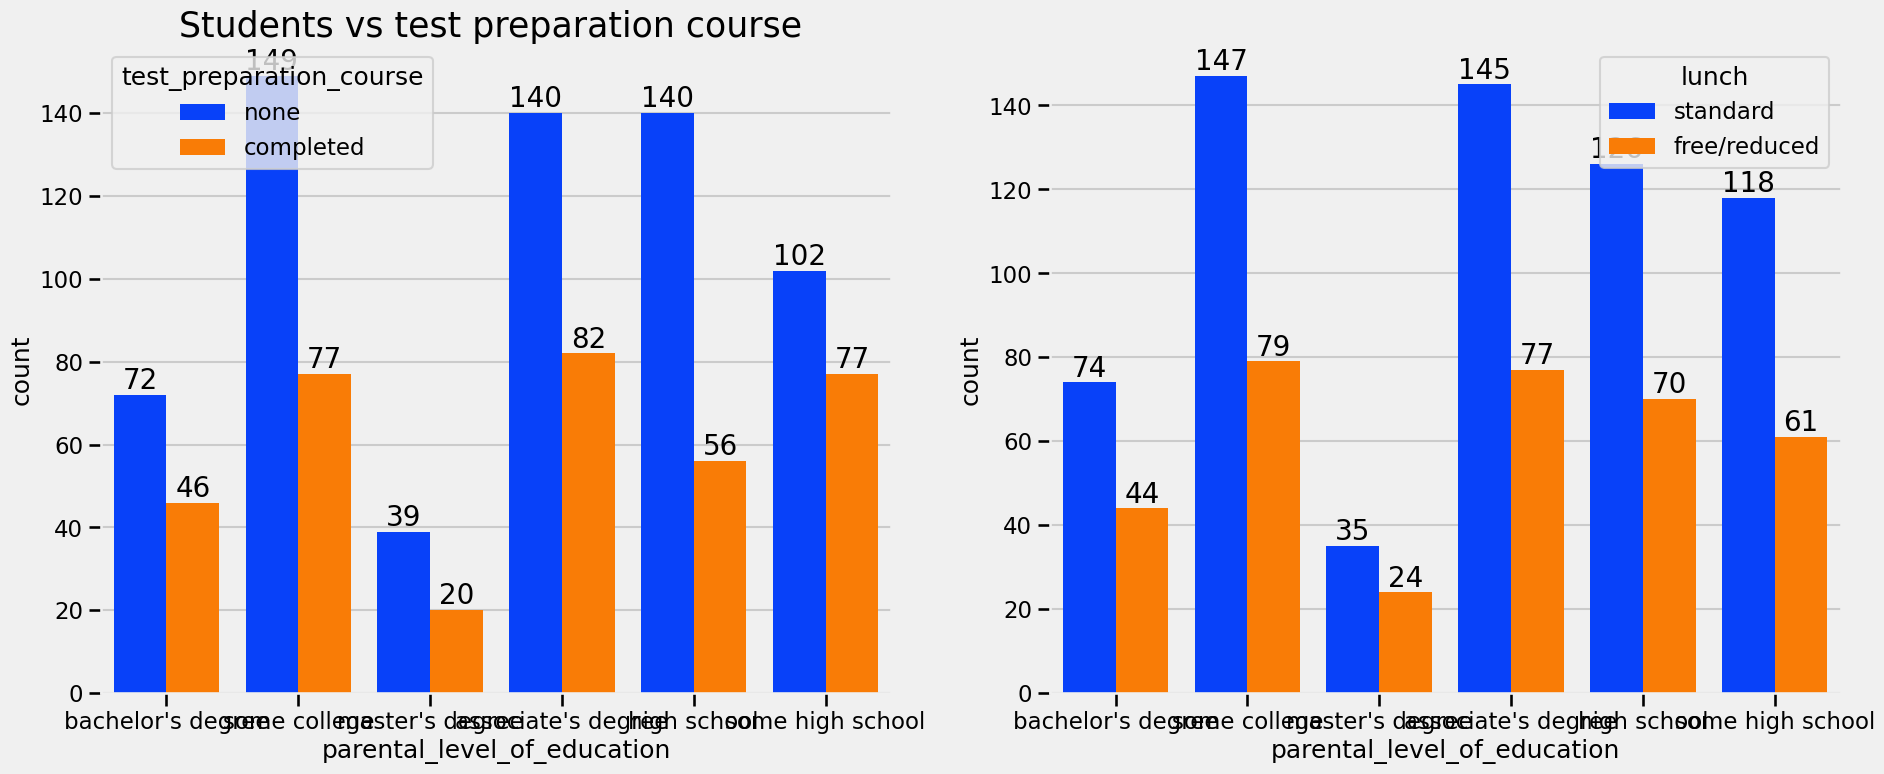

In [76]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=data['parental_level_of_education'],data=data,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=data['parental_level_of_education'],data=data,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

In [77]:
print(data.columns)

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')


<Axes: xlabel='lunch', ylabel='writing_score'>

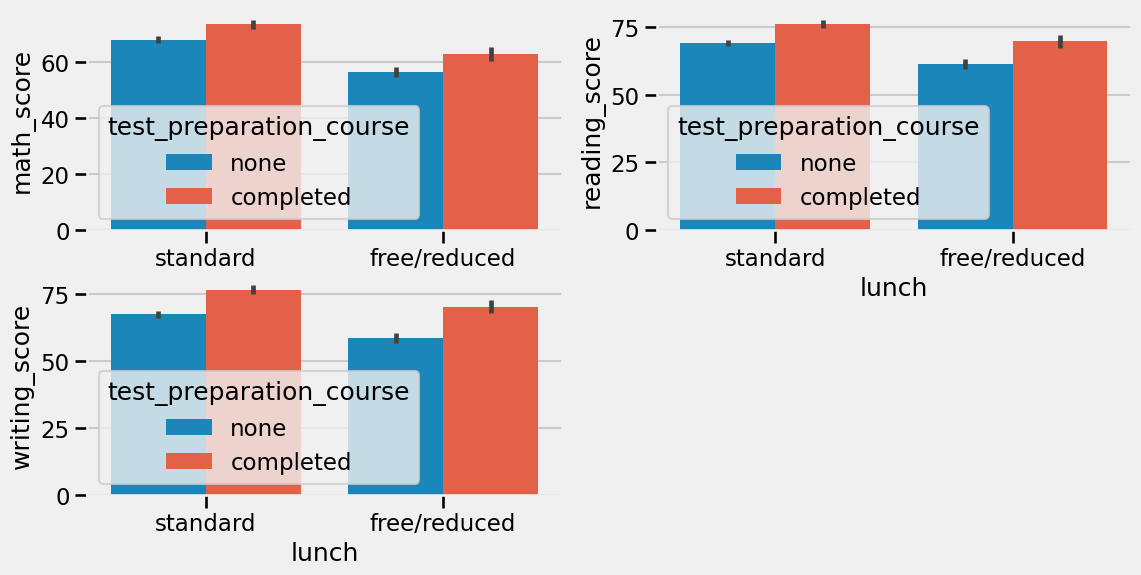

In [80]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=data['lunch'], y=data['math_score'], hue=data['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=data['lunch'], y=data['reading_score'], hue=data['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=data['lunch'], y=data['writing_score'], hue=data['test_preparation_course'])

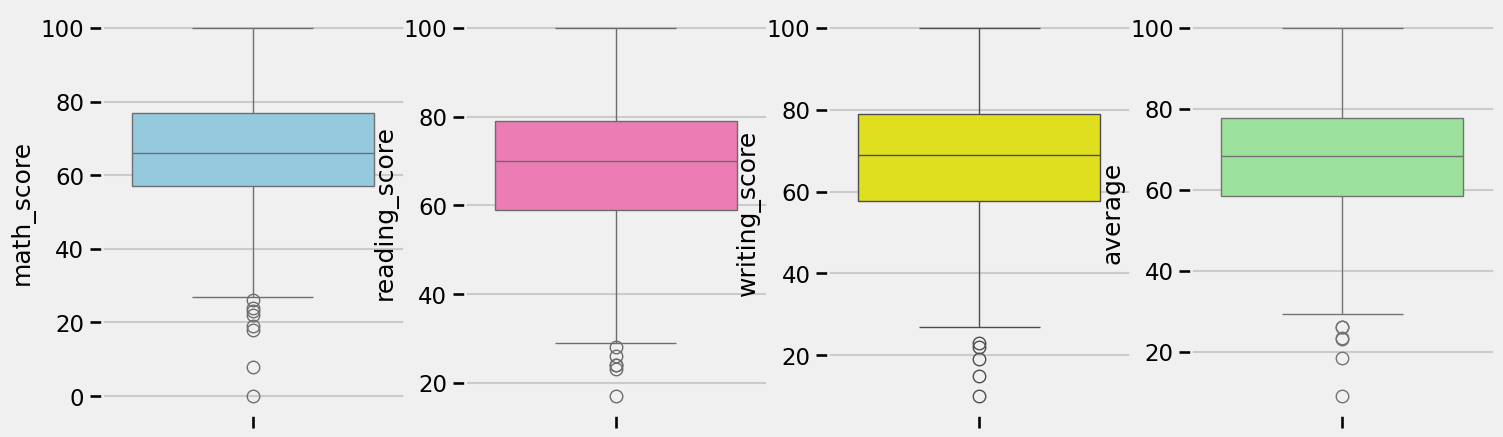

In [82]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['average'],color='lightgreen')
plt.show()